# Heart Failure Prediction - IA01 Project Autumn 2025
# UTT - Introduction to Artificial Intelligence
 
This notebook contains the exploratory data analysis, data preprocessing, 
and machine learning modeling steps for predicting heart failure. 
The dataset used combines multiple sources including Cleveland, Hungarian, 
Switzerland, Long Beach VA, and Stalog datasets, resulting in 918 observations 
after removing duplicates.

The goal is to analyze the dataset, identify important features, 
train several classification models (kNN, Decision Tree, Random Forest, 
Logistic Regression, Neural Networks), and evaluate their performance.


# We import important libraries to analyze the dataset
 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# First, we will load the heart failure dataset to explore and understand its contents.

In [53]:
heart_data = pd.read_csv('../data/heart.csv')
print(f"In our dataset we have {heart_data.shape[0]} rows and {heart_data.shape[1]} columns")
print("Example of our data: ")
print(heart_data.head())


In our dataset we have 918 rows and 12 columns
Example of our data: 
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


In [54]:
print(heart_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


In [32]:
heart_data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [33]:
heart_data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [39]:
for column in heart_data.columns:
    print(f"Unique values in column '{column}':")
    print(np.sort(heart_data[column].unique()))
    print("\n")

Unique values in column 'Age':
[28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
 76 77]


Unique values in column 'Sex':
['F' 'M']


Unique values in column 'ChestPainType':
['ASY' 'ATA' 'NAP' 'TA']


Unique values in column 'RestingBP':
[  0  80  92  94  95  96  98 100 101 102 104 105 106 108 110 112 113 114
 115 116 117 118 120 122 123 124 125 126 127 128 129 130 131 132 133 134
 135 136 137 138 139 140 141 142 143 144 145 146 148 150 152 154 155 156
 158 160 164 165 170 172 174 178 180 185 190 192 200]


Unique values in column 'Cholesterol':
[  0  85 100 110 113 117 123 126 129 131 132 139 141 142 147 149 152 153
 156 157 159 160 161 163 164 165 166 167 168 169 170 171 172 173 174 175
 176 177 178 179 180 181 182 183 184 185 186 187 188 190 192 193 194 195
 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213
 214 215 216 217 218 219 220 221 222 223 224 225 226 227 22

In [60]:
print(f"Number of duplicate rows: {heart_data.duplicated().sum()}")
print(f"Check for the null values: \n{heart_data.isnull().sum()}")

Number of duplicate rows: 0
Check for the null values: 
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


# Now we can analyze the dispersion of each variable

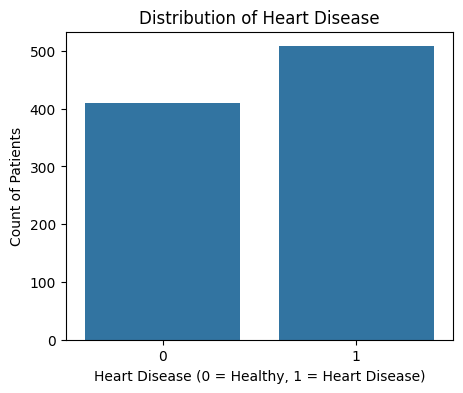

In [63]:
plt.figure(figsize=(5, 4))
sns.countplot(x='HeartDisease', data=heart_data)
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease (0 = Healthy, 1 = Heart Disease)')
plt.ylabel('Count of Patients')
plt.show()

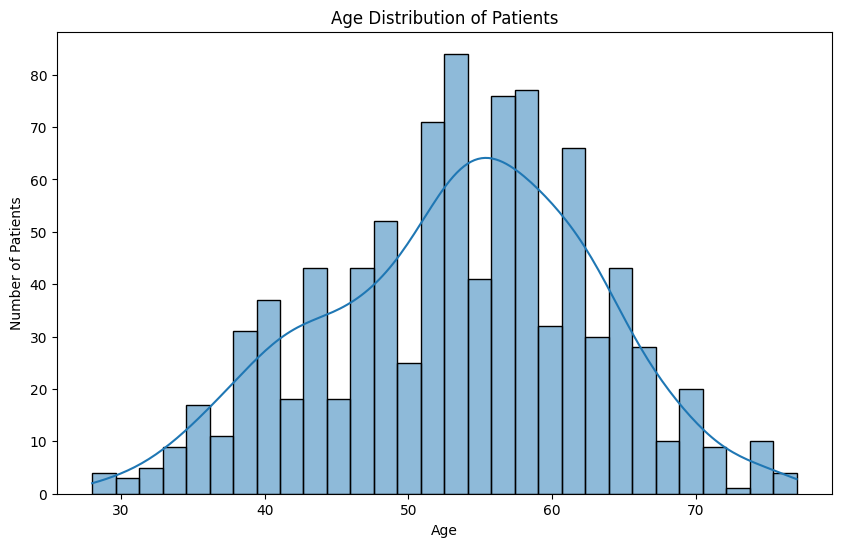

In [67]:
plt.figure(figsize=(10, 6))
# KDE - Kernel Density Estimate means that we gonna see the estimated continious distribution curve 
sns.histplot(data=heart_data, x='Age', bins=30, kde=True)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.show()

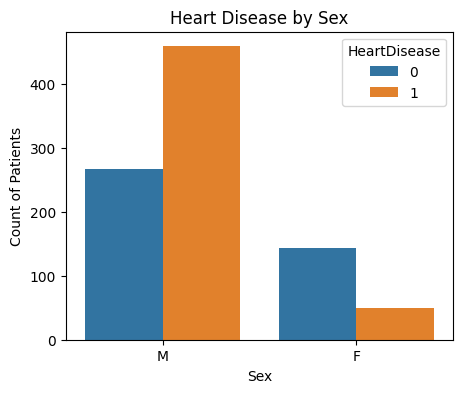

In [68]:
plt.figure(figsize=(5, 4))
sns.countplot(x="Sex", hue="HeartDisease", data=heart_data)
plt.title("Heart Disease by Sex")
plt.xlabel("Sex")
plt.ylabel("Count of Patients")
plt.show()

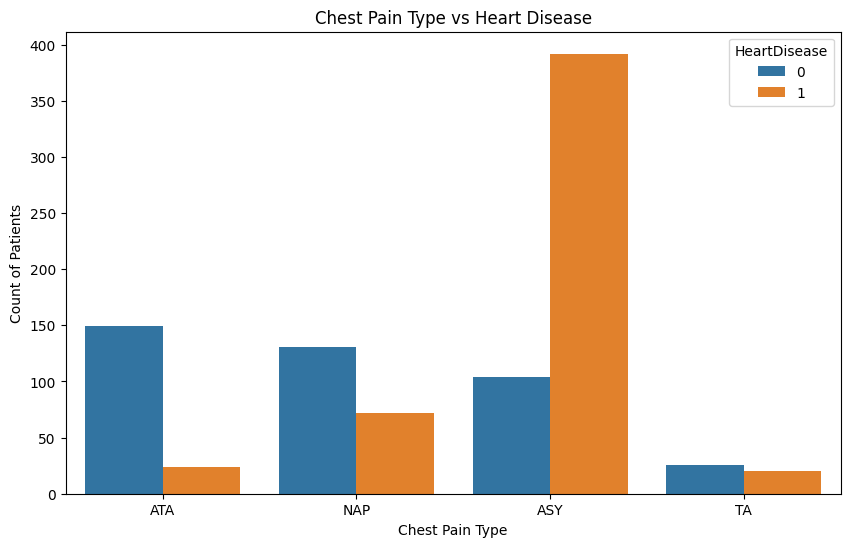

In [69]:
plt.figure(figsize=(10, 6 ))
sns.countplot(x="ChestPainType", hue="HeartDisease", data=heart_data)
plt.title("Chest Pain Type vs Heart Disease")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count of Patients")
plt.show()

# I have found that we have 172 lines where Cholesterol is not written. We have to do something with missing values

In [46]:
print(f"We have {heart_data[heart_data["Cholesterol"] == 0].shape[0]} missing values, cause this lines are equal to 0 in Cholesterol column")
print(heart_data[heart_data["Cholesterol"] == 0].head())

We have 172 missing values, cause this lines are equal to 0 in Cholesterol column
     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
293   65   M           ASY        115            0          0     Normal   
294   32   M            TA         95            0          1     Normal   
295   61   M           ASY        105            0          1     Normal   
296   50   M           ASY        145            0          1     Normal   
297   57   M           ASY        110            0          1         ST   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
293     93              Y      0.0     Flat             1  
294    127              N      0.7       Up             1  
295    110              Y      1.5       Up             1  
296    139              Y      0.7     Flat             1  
297    131              Y      1.4       Up             1  


# Also I have found one line with the index 449 where have RestingBP and Cholesterolall equal to 0

In [48]:
print(heart_data[heart_data["RestingBP"] == 0])
print(f"\nThe line with the index {heart_data[heart_data["RestingBP"] == 0].index.to_list()[0]} has missing values in RestingBP and Cholesterol columns")

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
449   55   M           NAP          0            0          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
449    155              N      1.5     Flat             1  

The line with the index 449 has missing values in RestingBP and Cholesterol columns


<Axes: >

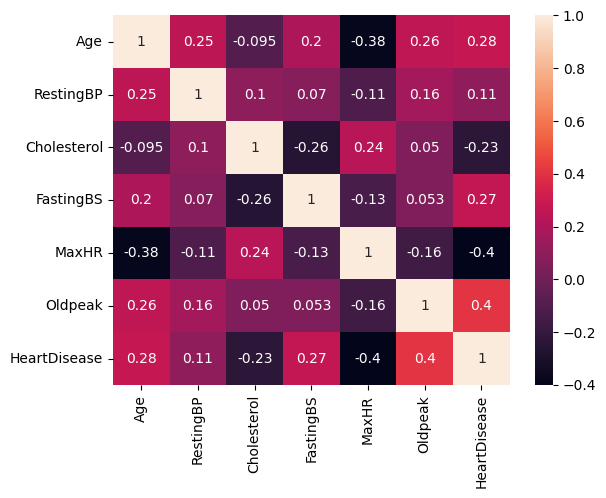

In [50]:
sns.heatmap(heart_data.corr(numeric_only=True), annot=True)

# Data Processing
To begin, we will start by transforming categorical variables

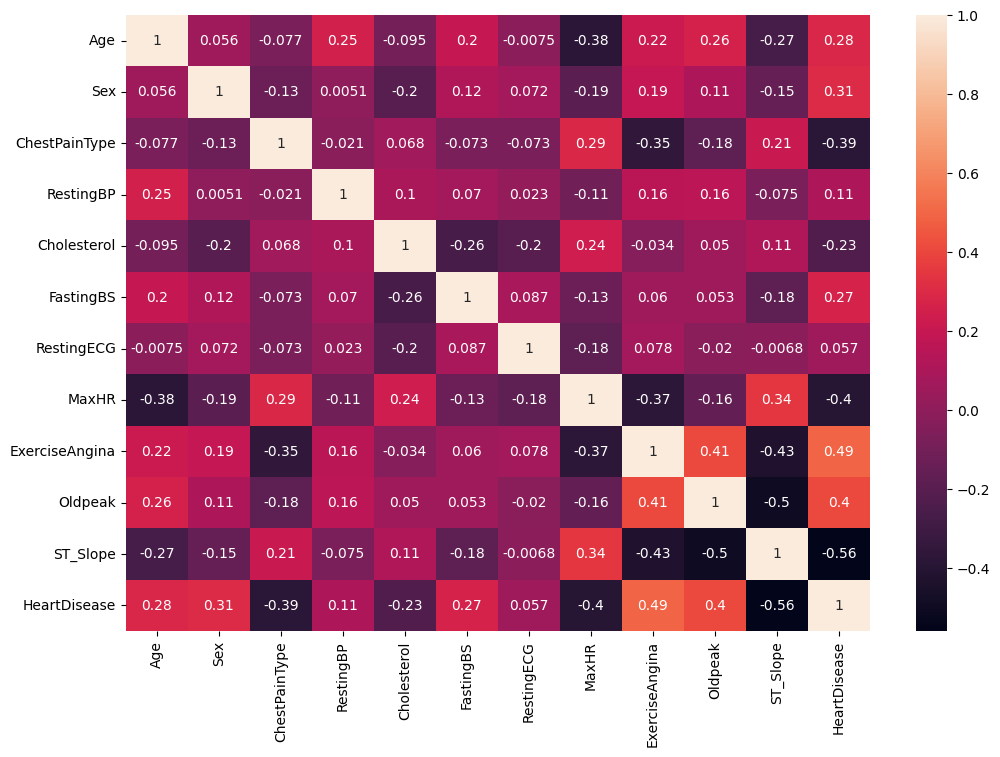

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import KNNImputer

heart_data_copy = heart_data.copy()
label_encoder = LabelEncoder()
categorical_columns = ["Sex", "ChestPainType", "FastingBS", "RestingECG", "ExerciseAngina", "ST_Slope", "HeartDisease"]
for column in categorical_columns:
    heart_data_copy[column] = label_encoder.fit_transform(heart_data_copy[column])
    
plt.figure(figsize=(12, 8))
sns.heatmap(heart_data_copy.corr(numeric_only=True), annot=True)


# I test to use KNN imputer 
# First I replace all 0 numbers by 0, cause KNN works only with NaN
heart_data_copy["Cholesterol"].replace(0, np.nan, inplace=True)
imputer = KNNImputer(n_neighbors=5, weights='uniform')
heart_data_copy[['Cholesterol']] = imputer.fit_transform(heart_data_copy[['Cholesterol']])